Flustre Technlology is the largest producer of electric vehicle batteries. They provide batteries on rent to electric vehicles drivers. Drivers rent a battery typically for a day and thereafter replace it with a charged battery from the company . Flustre Technology has a variable pricing model on the drivers driving history. Battery life depends on factors such as over speeding, distance driven per day etc. Objectives of this Assignment Create a cluster model where drivers can be grouped together based on driving data and group the data points so that drivers will be incentivized based on the cluster. 



In [2]:
#Importing the dataset and finding out the features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("C:/Users/afsaln2/Desktop/kaggle/icfos/Assignments/asg day 7/driver-data.csv")
df.head()


,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
df.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc'], dtype='object')

We find that the ccolumns are Driver id, mean_dist_day and mean_over_speed_perc
Now we need to find mean, count, STD, minimum and maximum value of the dataset. 


In [6]:
df.describe()
#We find that there are 4000 rows with the following chara
#We can drop the column id for further operations
df_new=df.drop('id', axis=1)
df_new

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [9]:
#Creating the K means instance and fitting
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(df_new)
centroids = kmeans.cluster_centers_
print(centroids)
kmeans

[[ 50.04763437   8.82875   ]
 [180.017075    18.29      ]]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

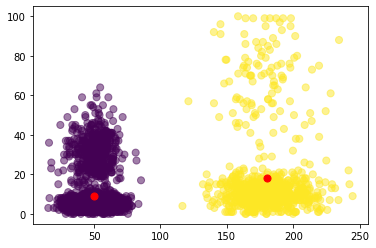

In [10]:
#Plotting the clusters
plt.scatter(df_new['mean_dist_day'], df['mean_over_speed_perc'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

We find 2 different clusters as we had chosen n_clusters as 2
Now, we evaluate the same case with n_clusters = 4 to observe the changes

In [11]:
#Creating the K means instance and fitting, case 2
kmeans_2 = KMeans(n_clusters=4).fit(df_new)
centroids = kmeans_2.cluster_centers_
print(centroids)
kmeans_2

[[ 49.99263253   5.20447169]
 [180.34311782  10.52011494]
 [ 50.40482436  32.36533958]
 [177.83509615  70.28846154]]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

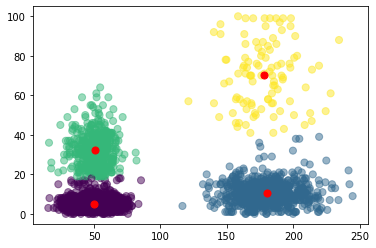

In [12]:
plt.scatter(df_new['mean_dist_day'], df['mean_over_speed_perc'], c= kmeans_2.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

Inferences that can be drawn from the comparison
We find that in the second case, since the number of centroids are more, they are
more evenly distributed among the data points.
In case of only two centroids, accuracy would have been lower as many data points are farther from the nearest centroid

One more case with 10 centroids can be tried to observe the difference

In [13]:
#Creating the K means instance and fitting, case 3
kmeans_3 = KMeans(n_clusters=10).fit(df_new)
centroids = kmeans_3.cluster_centers_
print(centroids)
kmeans_3

[[209.20354839  11.43548387]
 [ 54.55101434   5.31045082]
 [161.46015267  10.14885496]
 [161.3746      68.06      ]
 [ 50.5141519   33.2556962 ]
 [184.75897106  10.5659164 ]
 [ 34.62202899   5.67287785]
 [ 65.71098655   5.4573991 ]
 [193.22811321  72.94339623]
 [ 45.47556667   5.28777778]]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

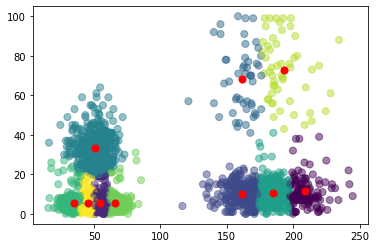

In [14]:
plt.scatter(df_new['mean_dist_day'], df['mean_over_speed_perc'], c= kmeans_3.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


Here, wer are able to understand the variation in the data better with 10 centroids, more than the earlier cases with 2, 4 clusters